No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


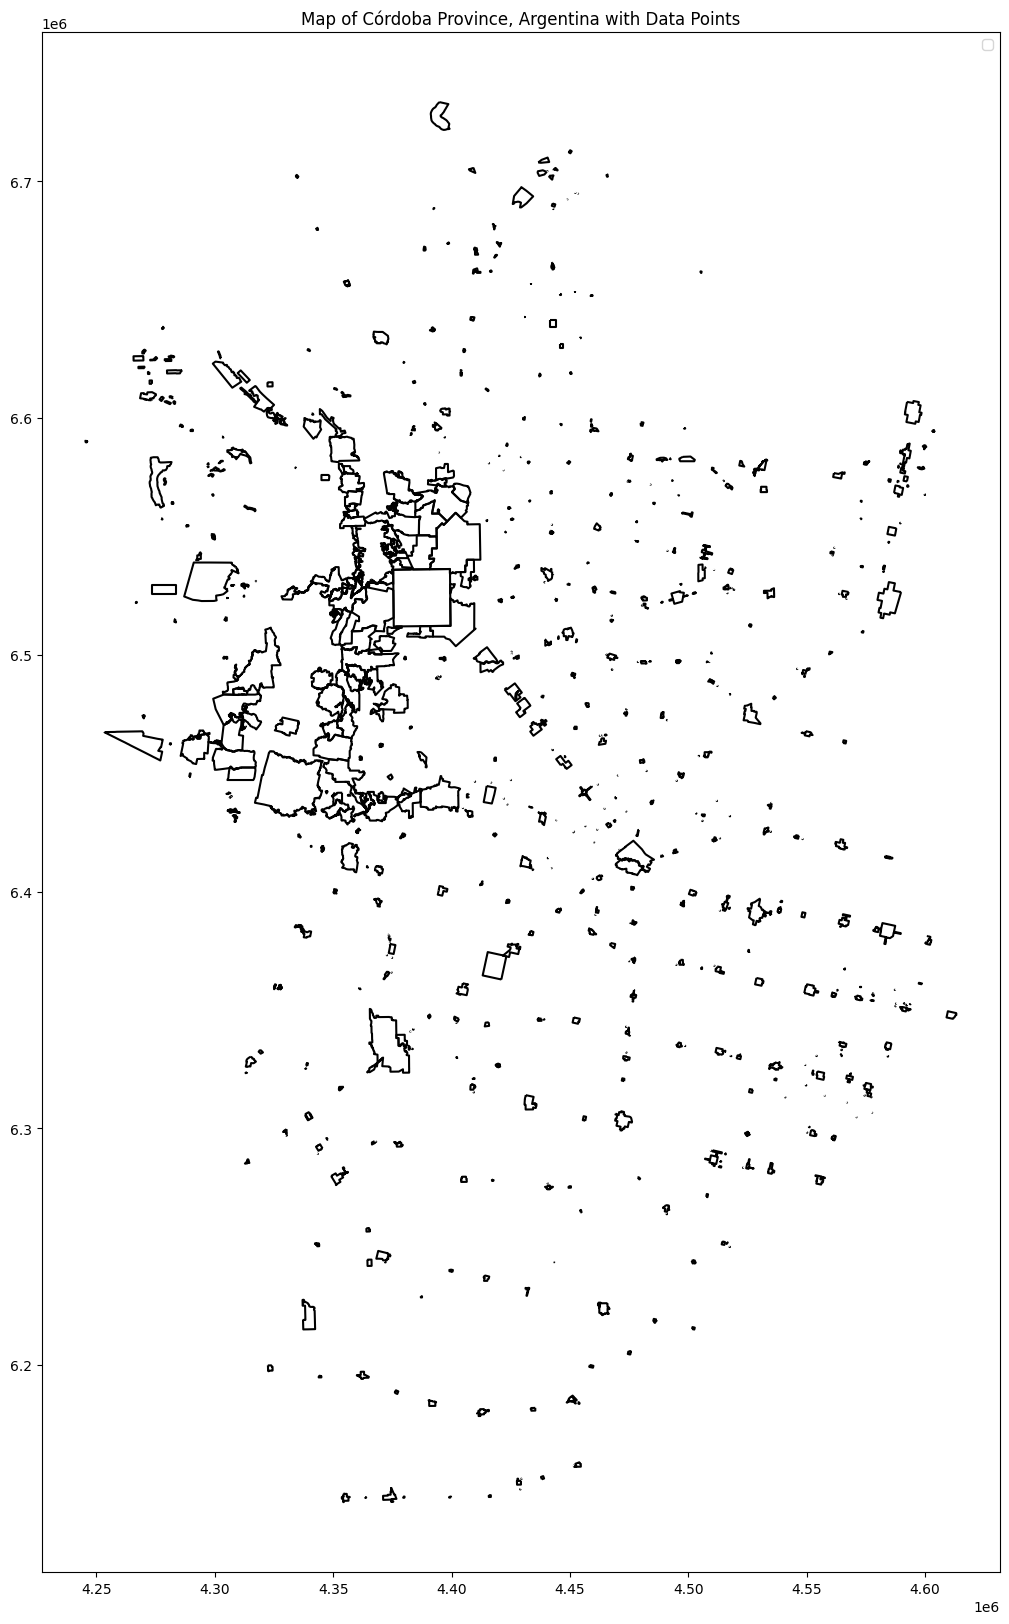

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the shapefile of Córdoba province
cordoba_shapefile = './utils/maps/radios_urbanos.shp'
cordoba_province = gpd.read_file(cordoba_shapefile)

# Create a plot with the province boundary and center the map on the mean position
fig, ax = plt.subplots(figsize=(20, 20))
cordoba_province.boundary.plot(ax=ax, color='black')

# Set the extent of the map to zoom out a bit around the mean position
map_padding = 0.2  # Increase the padding for more zoom-out effect

# Add a title
ax.set_title('Map of Córdoba Province, Argentina with Data Points')

# Define the coordinates of the point you want to plot
"""point_longitude = 4387000
point_latitude = 6524020"""

# Plot the point on the map
#ax.scatter(point_longitude, point_latitude, color='red', marker='o', label='Your Point')

# Show the legend
ax.legend()

# Show the plot
plt.show()


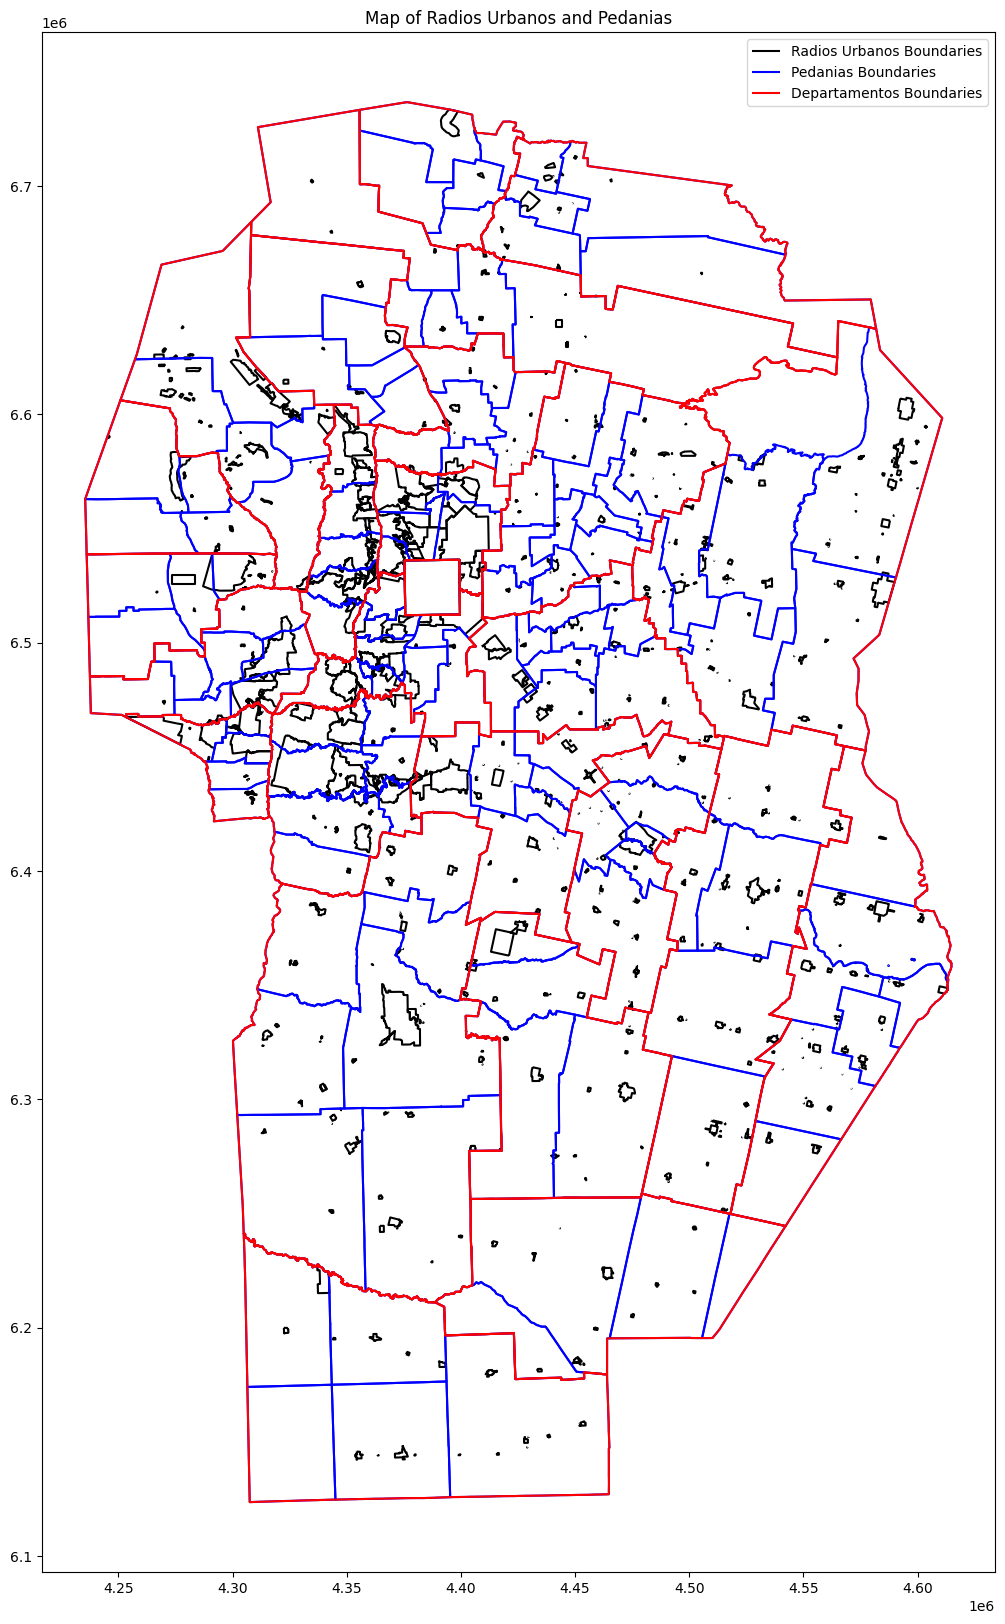

In [47]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the shapefiles
radios_urbanos_shapefile = './utils/maps/radios_urbanos.shp'
pedanias_shapefile = './utils/maps/pedania.shp'
departamentos_shapefile = './utils/maps/departamentos.shp'

radios_urbanos = gpd.read_file(radios_urbanos_shapefile)
pedanias = gpd.read_file(pedanias_shapefile)
departamentos = gpd.read_file(departamentos_shapefile)

# Create a plot with the boundaries of both shapefiles
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the boundaries of radios_urbanos shapefile
radios_urbanos.boundary.plot(ax=ax, color='black', label='Radios Urbanos Boundaries')
# Plot the boundaries of pedanias shapefile
pedanias.boundary.plot(ax=ax, color='blue', label='Pedanias Boundaries')
departamentos.boundary.plot(ax=ax, color='red', label='Departamentos Boundaries')
# Set the extent of the map

# Add a title and legend
ax.set_title('Map of Radios Urbanos and Pedanias')
ax.legend()

# Show the plot
plt.show()


In [6]:
import geopandas as gpd
import pyproj

# Replace 'path_to_shapefile.shp' with the actual path to your shapefile
shapefile_path = './utils/maps/departamentos.shp'
gdf = gpd.read_file(shapefile_path)

centroid = gdf.unary_union.centroid

# Transform the centroid to the desired CRS if needed
print("Centroid (lon, lat):", centroid)


Centroid (lon, lat): POINT (4424708.768444949 6445660.828924287)


(4383594.074101506, 6520701.142744395)


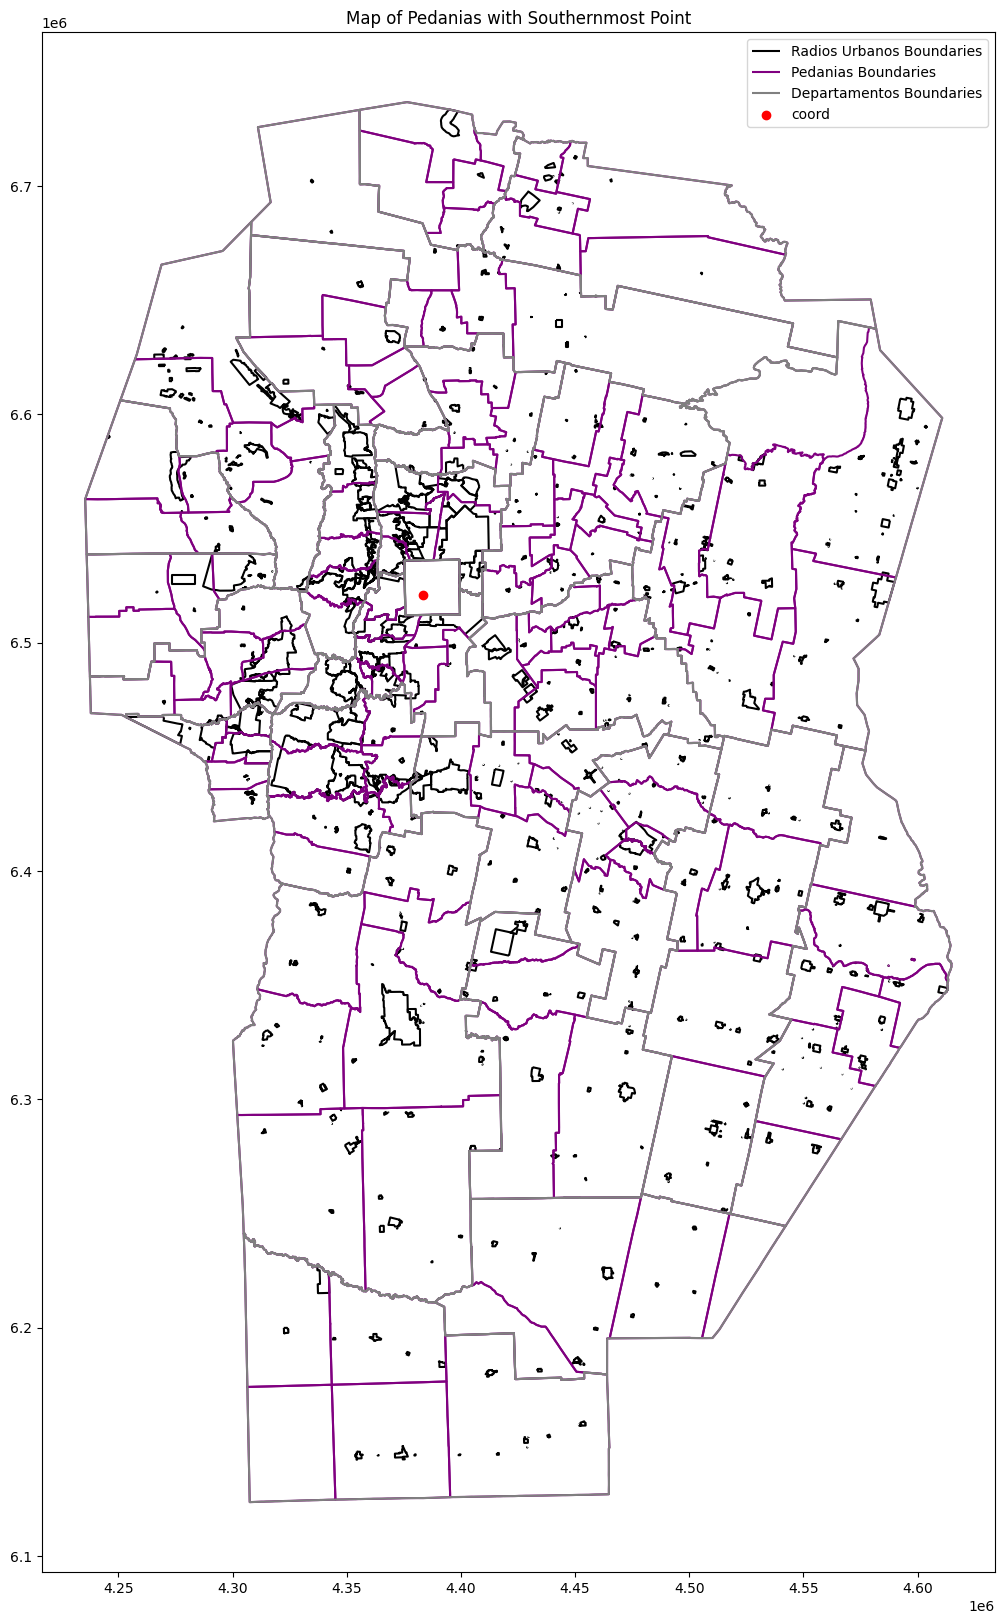

In [4]:
#PRUEBA
import geopandas as gpd
import matplotlib.pyplot as plt
import pyproj

# Define the source and target coordinate systems
source_crs = pyproj.CRS("EPSG:4326")  # WGS84 (latitude and longitude)
target_crs = pyproj.CRS("EPSG:22174")  # POSGAR 98 / Argentina 4

# Create a transformer
transformer = pyproj.Transformer.from_crs(source_crs, target_crs, always_xy=True)

# Transform a single point
lat, lon = -31.447729, -64.224572 # Example longitude and latitude
easting, northing = transformer.transform(lon, lat)

coords = (easting, northing)

# Read the shapefiles
radios_urbanos_shapefile = './utils/maps/radios_urbanos.shp'
pedanias_shapefile = './utils/maps/pedania.shp'
departamentos_shapefile = './utils/maps/departamentos.shp'

radios_urbanos = gpd.read_file(radios_urbanos_shapefile)
pedanias = gpd.read_file(pedanias_shapefile)
departamentos = gpd.read_file(departamentos_shapefile)

# Create a plot with the boundaries of both shapefiles
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the boundaries of radios_urbanos shapefile
radios_urbanos.boundary.plot(ax=ax, color='black', label='Radios Urbanos Boundaries')
# Plot the boundaries of pedanias shapefile
pedanias.boundary.plot(ax=ax, color='purple', label='Pedanias Boundaries')
departamentos.boundary.plot(ax=ax, color='gray', label='Departamentos Boundaries')

# Plot the southernmost point
ax.scatter(coords[0], coords[1], color='red', label='coord')

# Set the title and legend
ax.set_title('Map of Pedanias with Southernmost Point')
ax.legend()
print(coords)

# Show the plot
plt.show()


In [20]:
import geopandas as gpd

shapefile_path = "./utils/maps/kmz/doc-polygon.shp"

# Read the Shapefile using geopandas
gdf = gpd.read_file(shapefile_path)

# Get the coordinate reference system (CRS) of the GeoDataFrame
crs = gdf.crs

print("Coordinate Reference System (CRS):")
print(crs)


Coordinate Reference System (CRS):
EPSG:4326


C:\Users\ihorrocks\AppData\Local\Temp\ipykernel_60048\1639640271.py:26: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


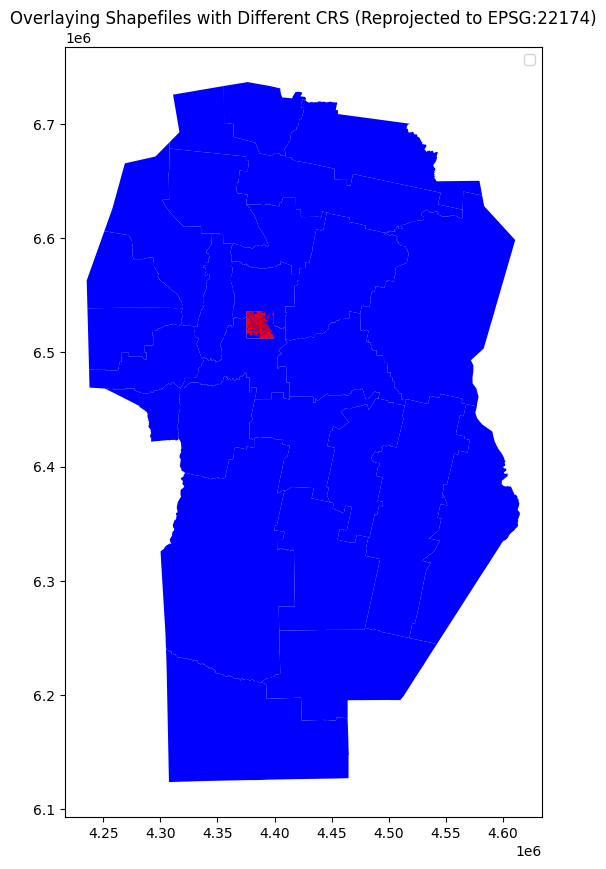

In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pyproj

# Paths to your Shapefiles
shapefile_4326 = "./utils/maps/barrios.shp"  # CRS: EPSG:4326
shapefile_22174 = "./utils/maps/departamentos.shp"  # CRS: EPSG:22174

# Read the Shapefiles
gdf_4326 = gpd.read_file(shapefile_4326)
gdf_22174 = gpd.read_file(shapefile_22174)

# Reproject the GeoDataFrame with EPSG:4326 CRS to EPSG:22174 CRS
target_crs = pyproj.CRS("EPSG:22174")
gdf_4326_reprojected = gdf_4326.to_crs(target_crs)

# Create a plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the data from both GeoDataFrames
gdf_22174.plot(ax=ax, color='blue', label='EPSG:22174')
gdf_4326_reprojected.plot(ax=ax, color='red', label='EPSG:4326 (Reprojected)')

# Set the title and legend
ax.set_title('Overlaying Shapefiles with Different CRS (Reprojected to EPSG:22174)')
ax.legend()

# Show the plot
plt.show()


In [29]:
# Read the shapefiles
barrios_shp = './utils/maps/barrios.shp'
barrios = gpd.read_file(barrios_shp)
# Calculate the bounding box of the entire shapefile
bbox = barrios.total_bounds

# Calculate the center point of the bounding box
center_x = (bbox[0] + bbox[2]) / 2
center_y = (bbox[1] + bbox[3]) / 2

print(f"Center coordinates: {center_x}, {center_y}")

min_x, min_y, max_x, max_y = bbox

print(f"Minimum X: {min_x}, Maximum X: {max_x}")
print(f"Minimum Y: {min_y}, Maximum Y: {max_y}")


Center coordinates: -64.18365408774824, -31.41675384652835
Minimum X: -64.3099256704322, Maximum X: -64.0573825050643
Minimum Y: -31.5249844713343, Maximum Y: -31.3085232217224


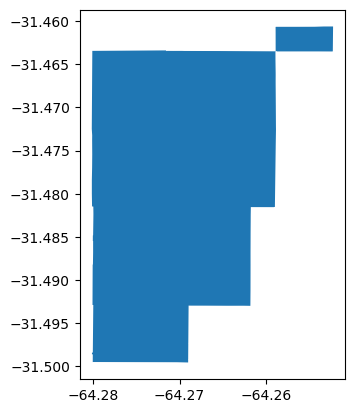

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile using GeoPandas
shapefile_path = './utils/maps/barrios.shp'
gdf = gpd.read_file(shapefile_path)

# Choose the index of the polygon you want to plot
polygon_index = 445  # Change this to the desired polygon index

# Select the specific polygon using its index
selected_polygon = gdf.iloc[polygon_index]

# Create a new GeoDataFrame containing only the selected polygon
selected_gdf = gpd.GeoDataFrame([selected_polygon], geometry='geometry')

# Create a plot
fig, ax = plt.subplots()

# Plot the selected polygon
selected_gdf.plot(ax=ax)

# Show the plot
plt.show()


In [12]:
import geopandas as gpd

# Load the shapefile using GeoPandas
shapefile_path = './utils/maps/barrios.shp'
gdf = gpd.read_file(shapefile_path)

filt = gdf['Nombre'].str.contains('MANANTIALES')
gdf[filt]


,Name,descriptio,Antecedent,Field_1,Nombre,TipoBarrio,geometry
428,altamirano_b,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",ORD 13083/20 NU,altamirano_b,MANANTIALES,BarrioOficial,"POLYGON ((-64.21668 -31.45068, -64.21713 -31.4..."
445,cacciamano_g,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",NaN,cacciamano_g,MANANTIALES II,BarrioNoOficial,"MULTIPOLYGON (((-64.25897 -31.46350, -64.25887..."
